In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

In [2]:
fname = "2020_11_3.hdf"
dset_name = "1604439211 rc laser height scan"

dset_names = [dset_name]
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM')

In [36]:
pmt_channel = 1
shutter_channel = 2
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [37]:
pmt_data = np.array([pxie[idx][:,pmt_channel] for idx in range(1, len(pxie)+1)])
shutter_data = np.array([pxie[idx][0,shutter_channel] for idx in range(1, len(pxie)+1)])

In [38]:
pmt_data = pmt_data.reshape(-1,40,2000)
shutter_data = shutter_data.reshape(-1,40)

In [39]:
positions = [549, 778, 2370, 1796, 1000, 145, 224, 1000, 659, 2205]

In [61]:
def average_data(dat):
    val = -np.mean(dat, axis = 0)
#     val -= np.append(val[:250], val[-100:]).mean()
    val -= val[:250].mean()
    return val

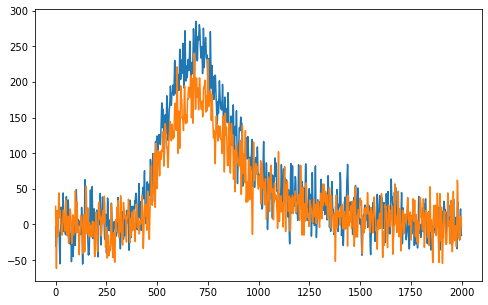

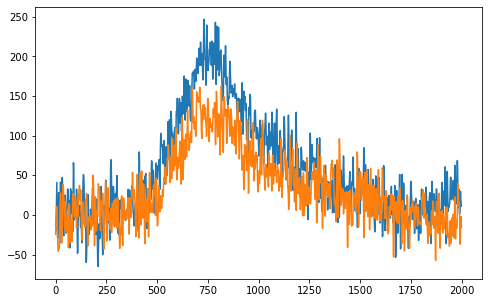

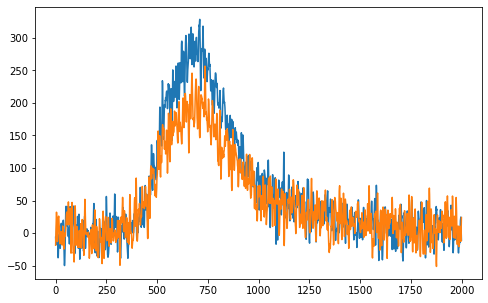

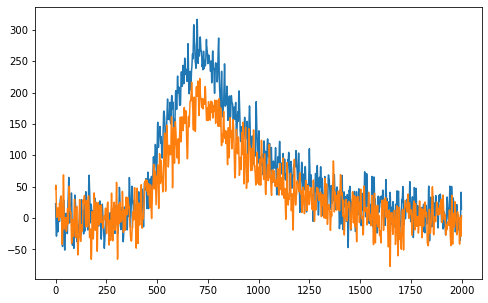

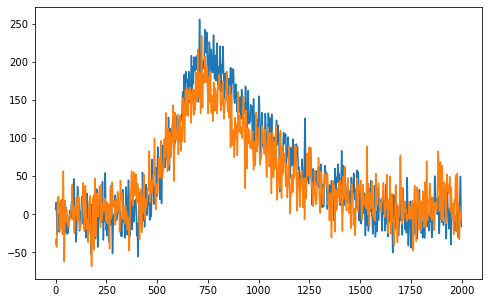

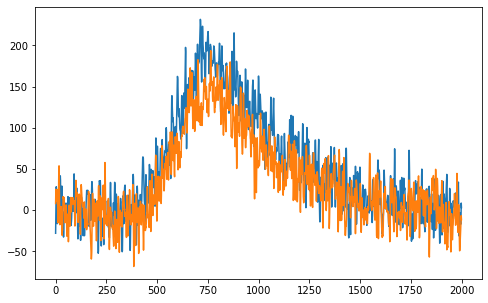

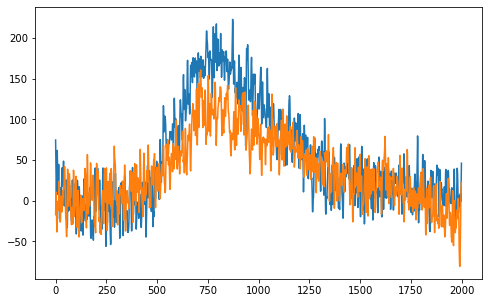

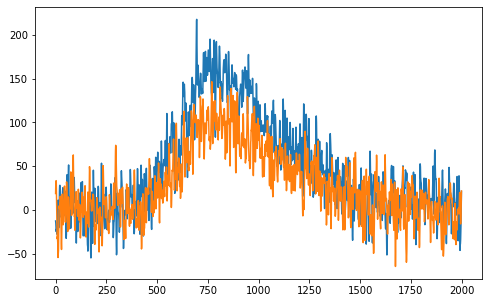

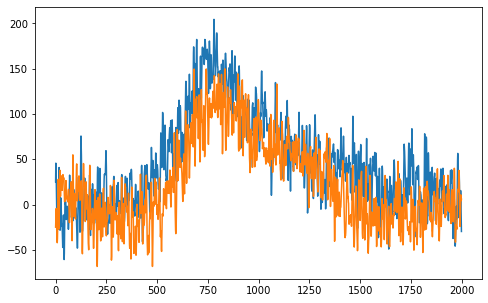

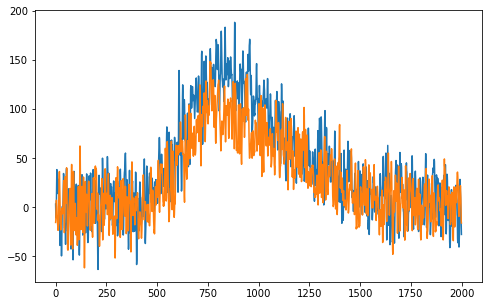

In [62]:
for idx, p in enumerate(positions):
    shutter_state = shutter_data[idx][0] > 2e3
    if shutter_state:
        m_open = np.s_[::2]
        m_closed = np.s_[1::2]
    else:
        m_open = np.s_[1::2]
        m_closed = np.s_[::2]
        
    dat_open = average_data(pmt_data[idx][m_open])
    dat_closed = average_data(pmt_data[idx][m_closed])
                        
    fig, ax = plt.subplots(figsize = (8,5))
    ax.plot(dat_open)
    ax.plot(dat_closed)

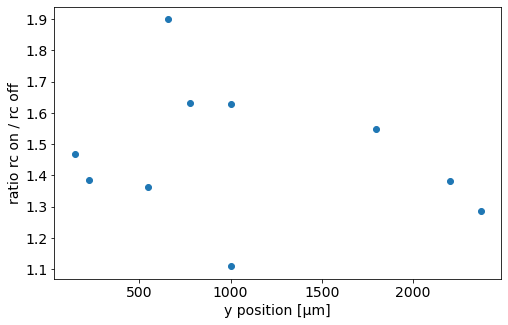

In [83]:
fig, ax = plt.subplots(figsize = (8,5))

for idx, p in enumerate(positions):
    shutter_state = shutter_data[idx][0] > 2e3
    if shutter_state:
        m_open = np.s_[::2]
        m_closed = np.s_[1::2]
    else:
        m_open = np.s_[1::2]
        m_closed = np.s_[::2]
        
    dat_open = average_data(pmt_data[idx][m_open])
    dat_closed = average_data(pmt_data[idx][m_closed])
    int_open = np.trapz(dat_open)
    int_closed = np.trapz(dat_closed)
    
    ax.plot(p, int_open/int_closed, '.', ms = 12, color = 'C0')
    
ax.set_xlabel('y position [μm]')
ax.set_ylabel('ratio rc on / rc off')

set_fontsize(ax, 14)

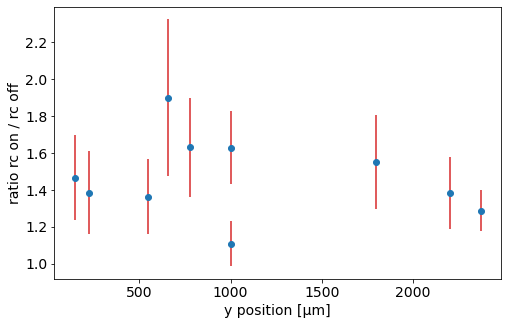

In [84]:
fig, ax = plt.subplots(figsize = (8,5))

for idx, p in enumerate(positions):
    shutter_state = shutter_data[idx][0] > 2e3
    if shutter_state:
        m_open = np.s_[::2]
        m_closed = np.s_[1::2]
    else:
        m_open = np.s_[1::2]
        m_closed = np.s_[::2]
    
    dat_open = pmt_data[idx][m_open] - np.mean(pmt_data[idx][m_open][:,:250], axis = 1)[:, np.newaxis]
    dat_closed = pmt_data[idx][m_closed] - np.mean(pmt_data[idx][m_closed][:,:250], axis = 1)[:, np.newaxis]
    dat_open = np.trapz(dat_open, axis = 1)
    dat_closed = np.trapz(dat_closed, axis = 1)
    int_open = np.mean(dat_open)
    int_closed = np.mean(dat_closed)
    σint_open = np.std(dat_open)/np.sqrt(len(dat_open))
    σint_closed = np.std(dat_closed)/np.sqrt(len(dat_closed))
    yerr = int_open/int_closed * np.sqrt((σint_open/int_open)**2 + (σint_closed/int_closed)**2)
    ax.errorbar(p, int_open/int_closed, yerr = yerr, fmt = '.', ms = 12, color = 'C0', 
                ecolor = 'C3')
    
ax.set_xlabel('y position [μm]')
ax.set_ylabel('ratio rc on / rc off')

set_fontsize(ax, 14)

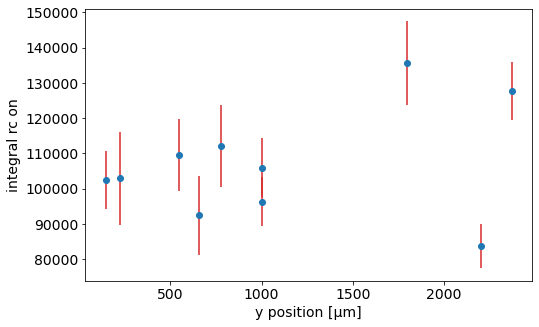

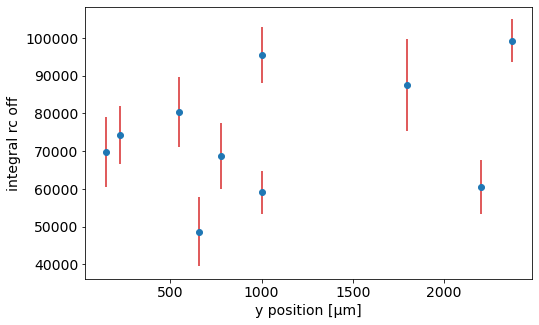

In [86]:
fig, ax = plt.subplots(figsize = (8,5))

for idx, p in enumerate(positions):
    shutter_state = shutter_data[idx][0] > 2e3
    if shutter_state:
        m_open = np.s_[::2]
        m_closed = np.s_[1::2]
    else:
        m_open = np.s_[1::2]
        m_closed = np.s_[::2]
    
    dat_open = pmt_data[idx][m_open] - np.mean(pmt_data[idx][m_open][:,:250], axis = 1)[:, np.newaxis]
    dat_open = np.trapz(dat_open, axis = 1)
    int_open = np.mean(-dat_open)
    σint_open = np.std(dat_open)/np.sqrt(len(dat_open))
    ax.errorbar(p, int_open, yerr = σint_open, fmt = '.', ms = 12, color = 'C0', 
                ecolor = 'C3')
    
ax.set_xlabel('y position [μm]')
ax.set_ylabel('integral rc on')

set_fontsize(ax, 14)

fig, ax = plt.subplots(figsize = (8,5))

for idx, p in enumerate(positions):
    shutter_state = shutter_data[idx][0] > 2e3
    if shutter_state:
        m_open = np.s_[::2]
        m_closed = np.s_[1::2]
    else:
        m_open = np.s_[1::2]
        m_closed = np.s_[::2]
    
    dat_closed = pmt_data[idx][m_closed] - np.mean(pmt_data[idx][m_closed][:,:250], axis = 1)[:, np.newaxis]
    dat_closed = np.trapz(dat_closed, axis = 1)
    int_closed = np.mean(-dat_closed)
    σint_closed = np.std(dat_closed)/np.sqrt(len(dat_closed))
    ax.errorbar(p, int_closed, yerr = σint_closed, fmt = '.', ms = 12, color = 'C0', 
                ecolor = 'C3')
    
ax.set_xlabel('y position [μm]')
ax.set_ylabel('integral rc off')

set_fontsize(ax, 14)